# 1 Linear Regression

In [1]:
import numpy as np

# create data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


## Normal Equation

### From Scratch

In [3]:
# get theta
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.19344082],
       [2.85674707]])

In [4]:
# make predictions

# create test input
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance

# predict
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.19344082],
       [9.90693496]])

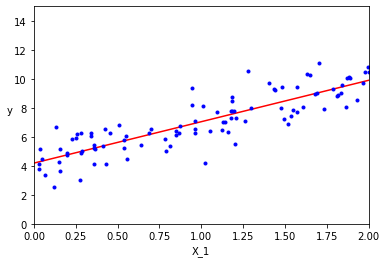

In [5]:
# plotting the model's predictions
import matplotlib.pyplot as plt 

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.ylabel("y", rotation = 0)
plt.xlabel("X_1")
plt.show()

## Using Scikit-learn

In [6]:
from sklearn.linear_model import LinearRegression

# set up and fit
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# scikit-learn have separate variables 
# for the intercept and the coefficients
lin_reg.intercept_, lin_reg.coef_

(array([4.19344082]), array([[2.85674707]]))

In [8]:
lin_reg.predict(X_new)

array([[4.19344082],
       [9.90693496]])

# 2 Gradient Descent

## Batch Gradient Descent

In [9]:
lr = 0.1 # learning rate
n_iterations = 1000
m = 100 # dataset size

theta = np.random.randn(2,1) # random initialization - two parameters

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - lr*gradients

theta

array([[4.19344082],
       [2.85674707]])

## Stochastic Gradient Descent (With simple learning schedule)

In [10]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
  return t0/(t + t1)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index:random_index+1]

    gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
    lr = learning_schedule(epoch*m*i)
    theta = theta - lr*gradients
theta

array([[4.3581179 ],
       [2.91542745]])

### Linear Regression with Stochastic Gradient Descent

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.17990217]), array([2.8282667]))